In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('training.csv')

In [14]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     29692 non-null  float64
 1   surface_y                     29692 non-null  float64
 2   bh_x                          27605 non-null  float64
 3   bh_y                          27605 non-null  float64
 4   standardized_operator_name    29692 non-null  int64  
 5   gross_perforated_length       22135 non-null  float64
 6   number_of_stages              2752 non-null   float64
 7   total_proppant                19080 non-null  float64
 8   total_fluid                   19076 non-null  float64
 9   true_vertical_depth           28197 non-null  float64
 10  ffs_frac_type                 14585 non-null  object 
 11  proppant_intensity            18971 non-null  float64
 12  frac_fluid_intensity          18946 non-null  float64
 13  a

In [16]:
info_df = pd.DataFrame({'type':df.dtypes, 'count':df.count()})

<Axes: >

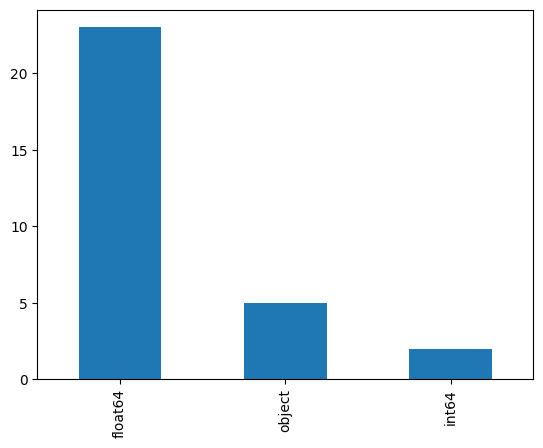

In [17]:
info_df.type.value_counts().plot(kind='bar')

#### Missing percentage

In [18]:
total_rows = len(df)

In [19]:
# find nan percentage in each column
nan_percentage = df.isnull().sum() / total_rows *100

<Axes: >

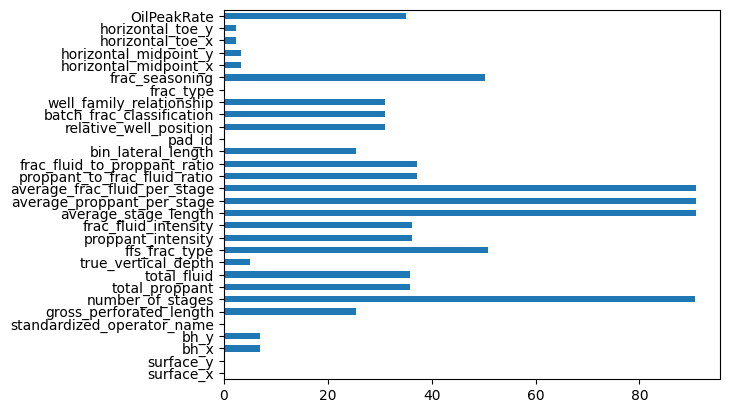

In [20]:
nan_percentage.plot(kind='barh')


<Axes: >

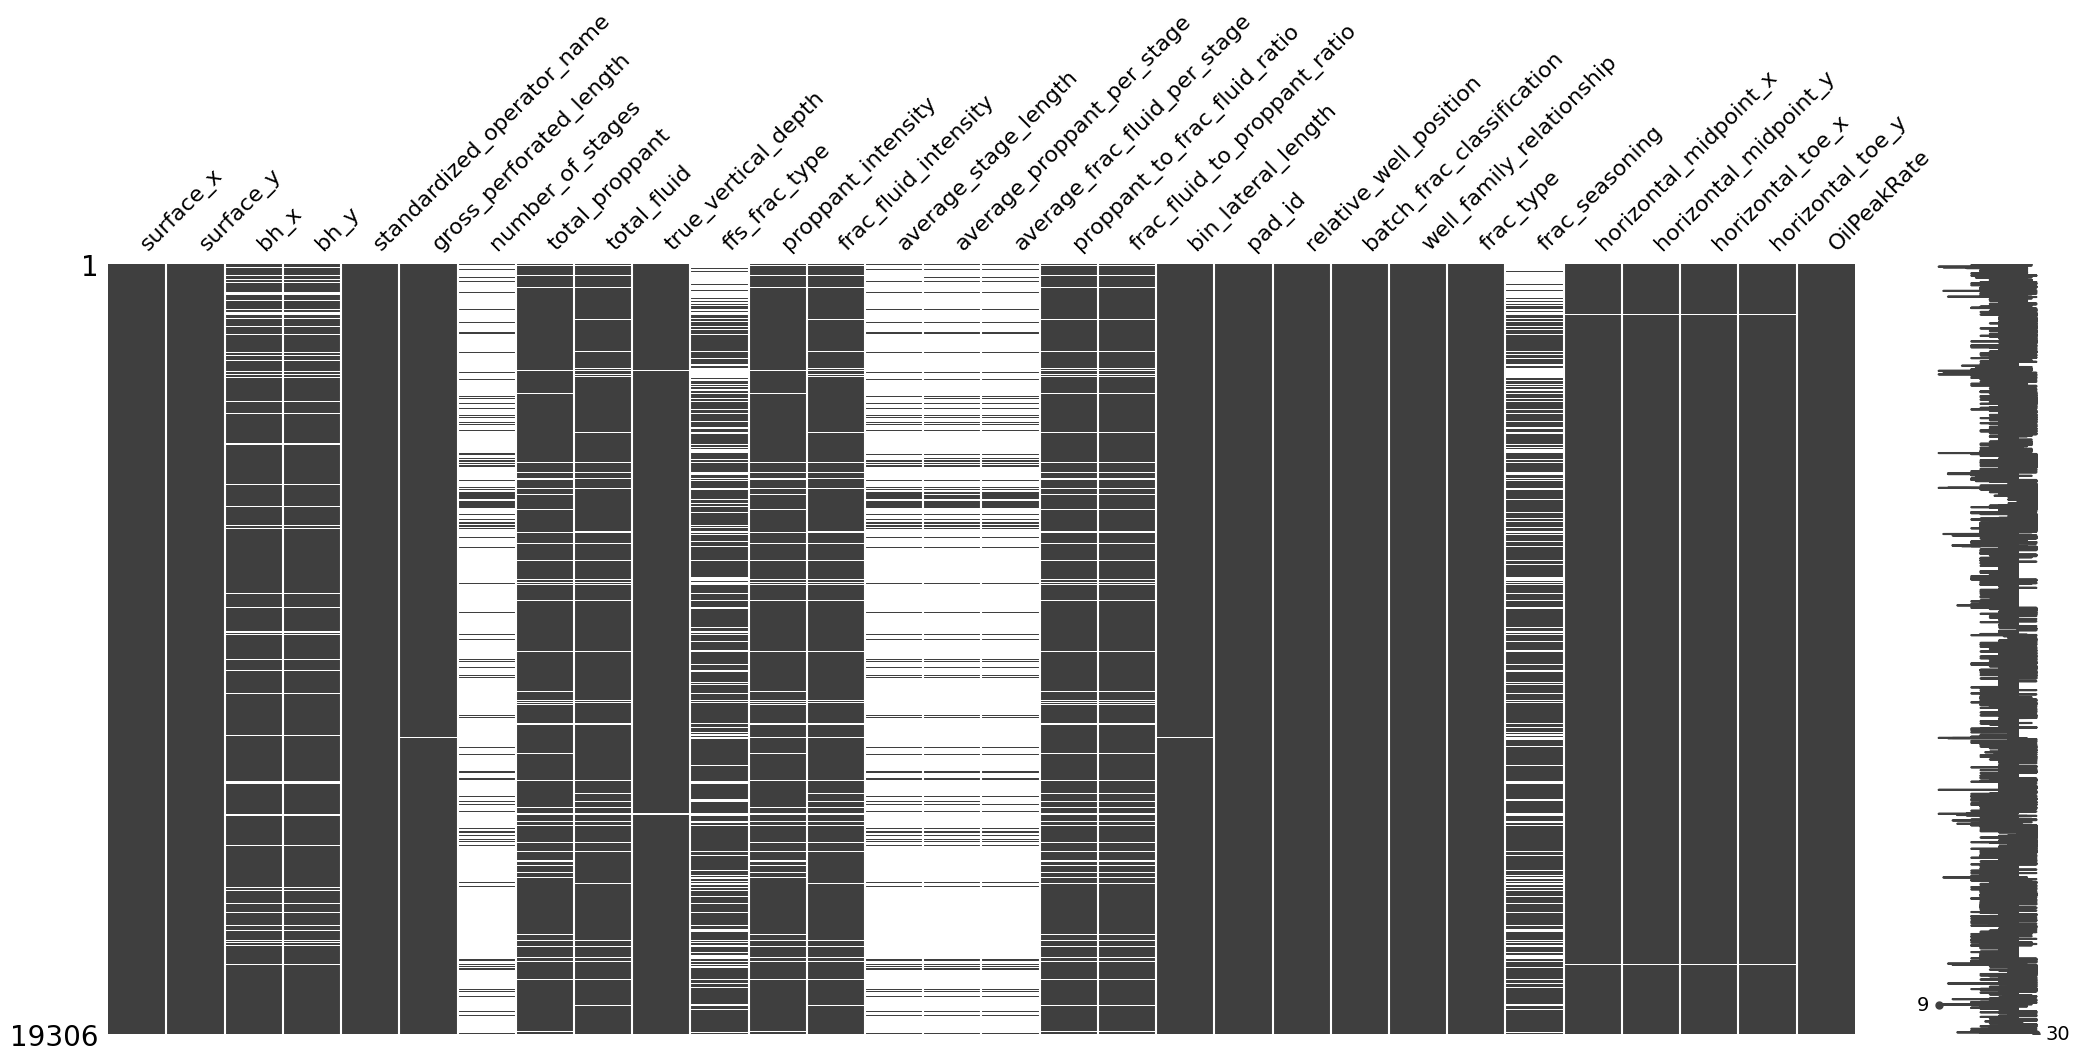

In [22]:
# find nan in column OilPeakRate
import missingno as msno
msno.matrix(df[~df['OilPeakRate'].isnull()])

In [38]:
df.corr()

C:\Users\sgnka\AppData\Local\Temp\ipykernel_17560\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,pad_id,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
surface_x,1.000000,-0.106975,0.999068,-0.100808,0.069228,-0.079806,-0.239269,-0.090476,-0.160275,-0.202223,...,0.011804,-0.010911,-0.057644,-0.011884,0.024606,0.999755,-0.106817,0.999095,-0.106665,0.010566
surface_y,-0.106975,1.000000,-0.099749,0.999947,-0.041139,0.432122,0.268174,0.166891,0.323551,-0.348102,...,-0.013888,0.067826,0.366364,0.012974,0.007719,-0.106357,0.999986,-0.105733,0.999949,-0.088519
bh_x,0.999068,-0.099749,1.000000,-0.099941,0.060304,-0.071579,-0.234884,-0.084540,-0.152992,-0.196994,...,0.011425,-0.005977,-0.047970,-0.014285,0.026621,0.999760,-0.101667,0.999990,-0.101674,0.018243
bh_y,-0.100808,0.999947,-0.099941,1.000000,-0.038496,0.435094,0.259811,0.161045,0.319626,-0.355258,...,-0.013361,0.063057,0.371151,0.011989,0.004703,-0.102141,0.999986,-0.101694,0.999999,-0.098091
standardized_operator_name,0.069228,-0.041139,0.060304,-0.038496,1.000000,0.067794,-0.035002,0.027476,0.044536,-0.013160,...,-0.010143,0.012020,0.068058,-0.001183,-0.031801,0.067789,-0.044334,0.066350,-0.042227,0.037613
gross_perforated_length,-0.079806,0.432122,-0.071579,0.435094,0.067794,1.000000,0.839016,0.463567,0.788762,0.004733,...,-0.021030,0.010764,0.964878,-0.001749,0.077829,-0.078712,0.432963,-0.078250,0.432936,0.402726
number_of_stages,-0.239269,0.268174,-0.234884,0.259811,-0.035002,0.839016,1.000000,0.845211,0.811137,0.186878,...,-0.044525,-0.064443,0.798723,0.008386,0.161062,-0.237140,0.266894,-0.235079,0.266465,0.370949
total_proppant,-0.090476,0.166891,-0.084540,0.161045,0.027476,0.463567,0.845211,1.000000,0.509157,0.118792,...,0.206318,-0.083928,0.444527,0.000786,0.044028,-0.090047,0.166856,-0.089681,0.166795,0.286878
total_fluid,-0.160275,0.323551,-0.152992,0.319626,0.044536,0.788762,0.811137,0.509157,1.000000,0.170148,...,-0.052151,0.132737,0.755501,0.007843,0.114565,-0.159829,0.323955,-0.159454,0.323906,0.447488
true_vertical_depth,-0.202223,-0.348102,-0.196994,-0.355258,-0.013160,0.004733,0.186878,0.118792,0.170148,1.000000,...,-0.028574,-0.058589,0.019588,-0.004135,-0.022255,-0.201239,-0.351283,-0.201757,-0.349529,0.384515


<Axes: >

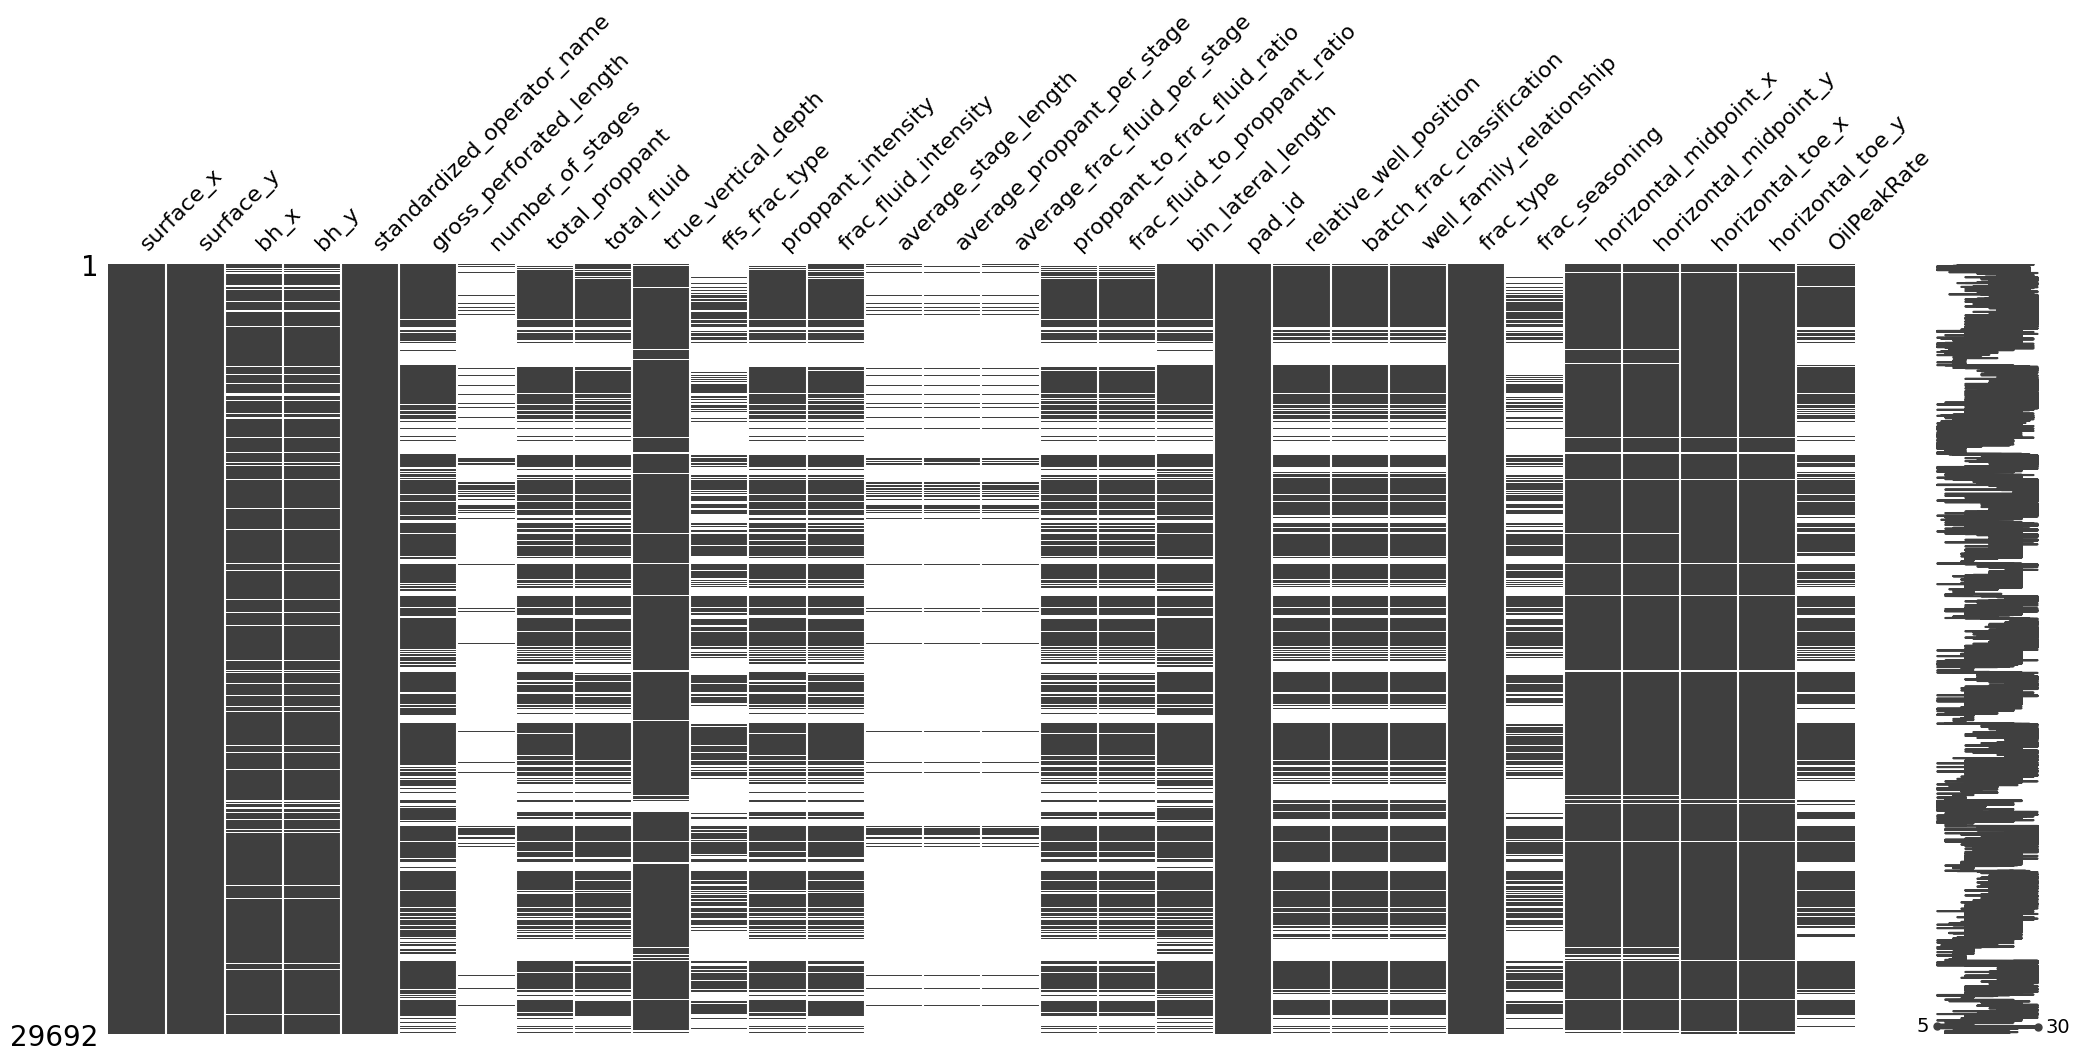

In [44]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [39]:
wrong = ['number_of_stages', 'average_stage_length', 'average_proppant_per_stage', 'average_frac_fluid_per_stage']

In [42]:
df.columns

Index(['surface_x', 'surface_y', 'bh_x', 'bh_y', 'standardized_operator_name',
       'gross_perforated_length', 'number_of_stages', 'total_proppant',
       'total_fluid', 'true_vertical_depth', 'ffs_frac_type',
       'proppant_intensity', 'frac_fluid_intensity', 'average_stage_length',
       'average_proppant_per_stage', 'average_frac_fluid_per_stage',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'pad_id', 'relative_well_position',
       'batch_frac_classification', 'well_family_relationship', 'frac_type',
       'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate'],
      dtype='object')

In [48]:
df[wrong+['OilPeakRate']]

KeyError: "['average_state_length'] not in index"

In [ ]:
df_dropped = df.drop(drop_cols, axis=1)

In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     29692 non-null  float64
 1   surface_y                     29692 non-null  float64
 2   bh_x                          27605 non-null  float64
 3   bh_y                          27605 non-null  float64
 4   standardized_operator_name    29692 non-null  int64  
 5   gross_perforated_length       22135 non-null  float64
 6   total_proppant                19080 non-null  float64
 7   total_fluid                   19076 non-null  float64
 8   true_vertical_depth           28197 non-null  float64
 9   proppant_intensity            18971 non-null  float64
 10  frac_fluid_intensity          18946 non-null  float64
 11  proppant_to_frac_fluid_ratio  18656 non-null  float64
 12  frac_fluid_to_proppant_ratio  18656 non-null  float64
 13  b

In [ ]:
info_df = pd.DataFrame({'type':df_dropped.dtypes, 'count':df_dropped.count()})

NameError: name 'df_dropped' is not defined

In [ ]:
info_df[info_df['type'] == 'object']

,type,count
ffs_frac_type,object,14585
relative_well_position,object,20467
batch_frac_classification,object,20467
well_family_relationship,object,20467
frac_type,object,29692


NameError: name 'df_dropped' is not defined

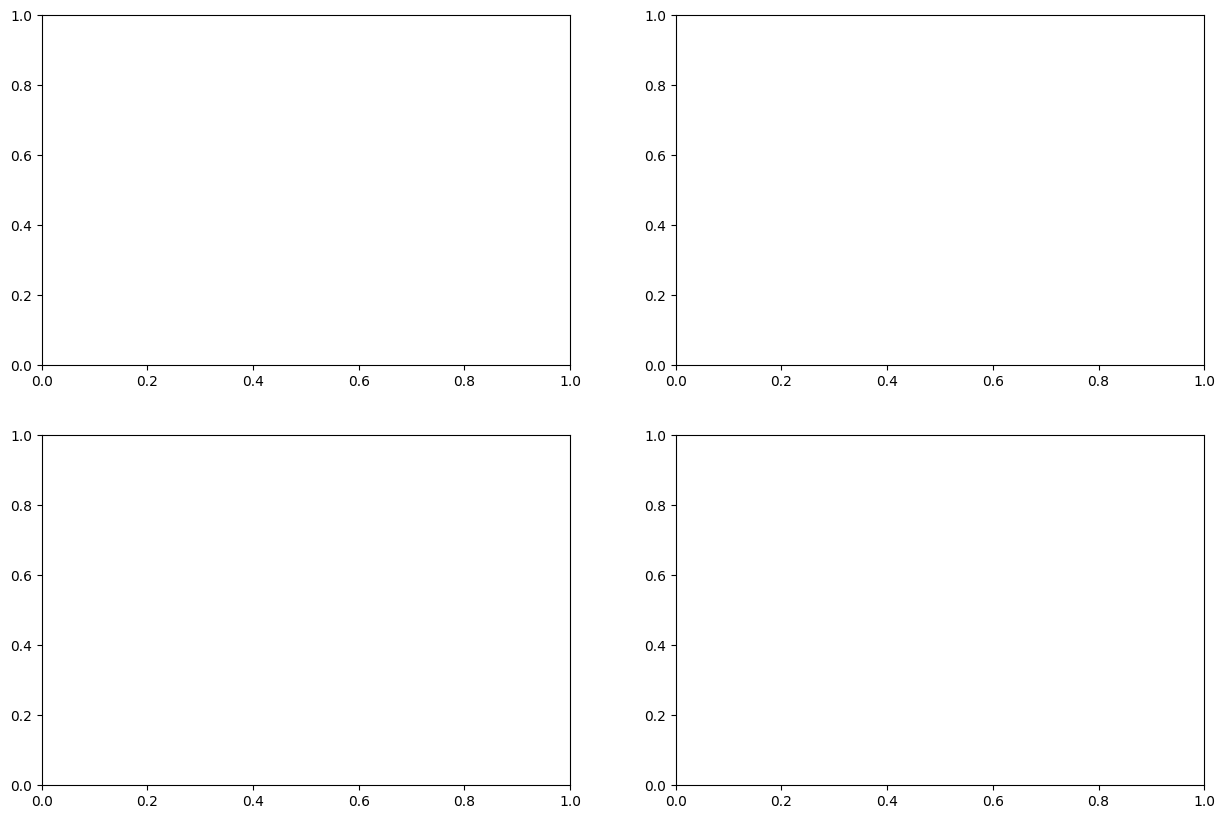

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df_dropped['relative_well_position'].value_counts().plot(kind='barh', ax=axes[0, 0])
df_dropped['batch_frac_classification'].value_counts().plot(kind='barh', ax=axes[0, 1])
df_dropped['well_family_relationship'].value_counts().plot(kind='barh', ax=axes[1, 0])
df_dropped['frac_type'].value_counts().plot(kind='barh', ax=axes[1, 1])

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
# label encode the categorical columns


le = LabelEncoder()
df_dropped['relative_well_position'] = le.fit_transform(df_dropped['relative_well_position'])
df_dropped['batch_frac_classification'] = le.fit_transform(df_dropped['batch_frac_classification'])
df_dropped['well_family_relationship'] = le.fit_transform(df_dropped['well_family_relationship'])
df_dropped['frac_type'] = le.fit_transform(df_dropped['frac_type'])



NameError: name 'df_dropped' is not defined

In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     29692 non-null  float64
 1   surface_y                     29692 non-null  float64
 2   bh_x                          27605 non-null  float64
 3   bh_y                          27605 non-null  float64
 4   standardized_operator_name    29692 non-null  int64  
 5   gross_perforated_length       22135 non-null  float64
 6   total_proppant                19080 non-null  float64
 7   total_fluid                   19076 non-null  float64
 8   true_vertical_depth           28197 non-null  float64
 9   proppant_intensity            18971 non-null  float64
 10  frac_fluid_intensity          18946 non-null  float64
 11  proppant_to_frac_fluid_ratio  18656 non-null  float64
 12  frac_fluid_to_proppant_ratio  18656 non-null  float64
 13  b

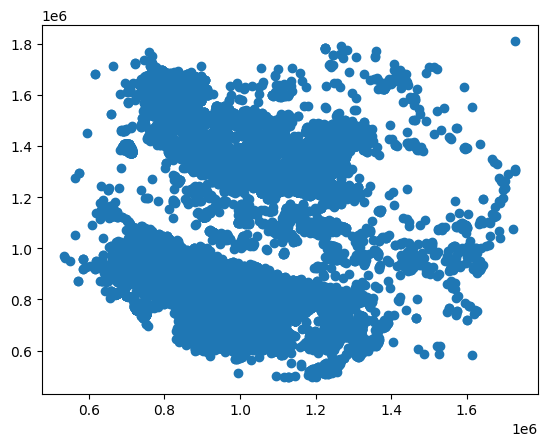

In [ ]:
plt.plot(df_dropped['surface_x'], df_dropped['surface_y'], )
# plt.plot(df_dropped['bh_x'], df_dropped['bh_y'], 'o')

<Axes: xlabel='surface_x', ylabel='surface_y'>

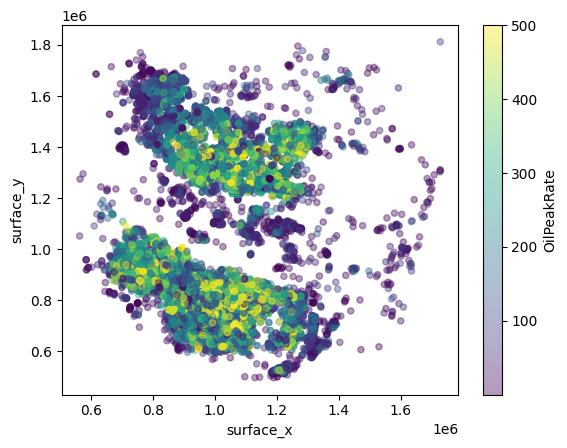

In [ ]:
df.plot(kind='scatter', x='surface_x', y='surface_y', c='OilPeakRate',alpha=0.4,vmin=500)
# df[df].plot(kind='scatter', x='surface_x', y='surface_y', c='OilPeakRate',alpha=0.4,vmax=500)

<Axes: xlabel='true_vertical_depth', ylabel='OilPeakRate'>

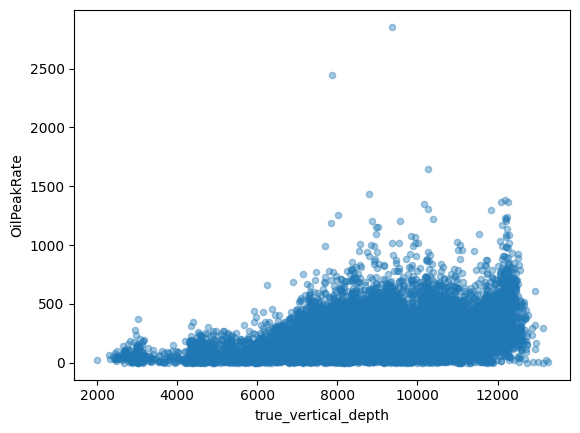

In [ ]:
df[['true_vertical_depth', 'OilPeakRate']].plot(kind='scatter', x='true_vertical_depth', y='OilPeakRate', alpha=0.4)

<Axes: >

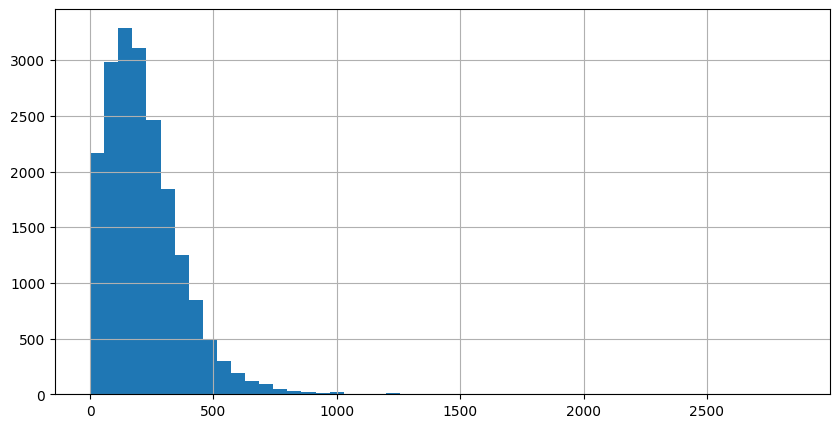

In [ ]:
df['OilPeakRate'].hist(bins=50, figsize=(10, 5))

In [ ]:
import seaborn as sns
sns.pairplot(df_dropped, hue='OilPeakRate')

KeyboardInterrupt: 

<Axes: xlabel='surface_x', ylabel='surface_y'>

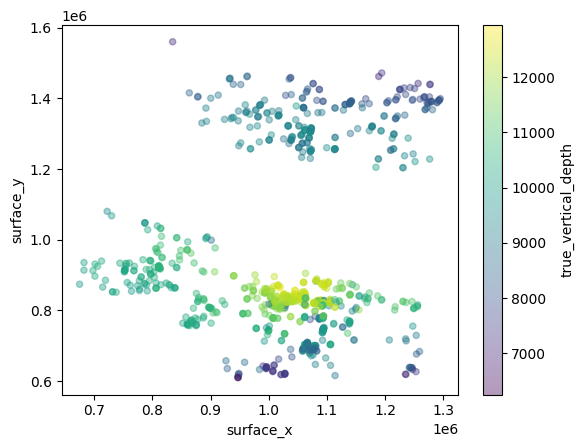

In [ ]:
df[df['OilPeakRate'] > 500].plot(kind='scatter', x='surface_x', y='surface_y', c='true_vertical_depth',alpha=0.4,)

<Axes: xlabel='surface_x', ylabel='surface_y'>

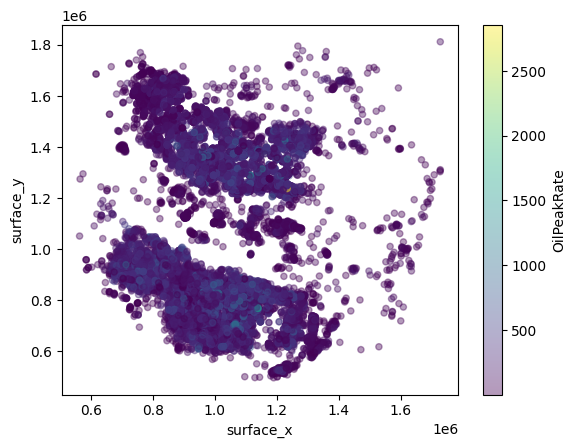

In [ ]:
df.plot(kind='scatter', x='surface_x', y='surface_y', c='OilPeakRate',alpha=0.4)

In [ ]:
df[['surface_x', 'surface_y']].duplicated().sum()

379

: 

### direction

In [ ]:
df

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,8712.598425,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,8627.952756,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,8801.181102,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,8635.826772,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,8664.370079,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29687,1441088.593,978921.8705,1432758.032,979984.5869,1050,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29688,1513299.189,976157.4486,1519890.072,975148.4820,1159,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29689,1458652.142,972862.2346,1453129.889,973195.0998,1050,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29690,1463417.436,972485.8276,1468807.765,971564.9743,1153,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
